In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)

encoded = Dense(256, activation='relu')(encoded)

encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(2,activation='relu', name="Encoded")(encoded)
print(encoded.shape)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
#decoded = Dense(1024, activation='relu')(decoded)

decoded = Dense(784, activation='sigmoid')(decoded)

(None, 2)


In [4]:
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=30,batch_size=64,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.2858 - val_loss: 0.2517
Epoch 2/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.2468 - val_loss: 0.2399
Epoch 3/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.2318 - val_loss: 0.2222
Epoch 4/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2185 - val_loss: 0.2164
Epoch 5/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2123 - val_loss: 0.2096
Epoch 6/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2077 - val_loss: 0.2054
Epoch 7/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2040 - val_loss: 0.2038
Epoch 8/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2009 - val_loss: 0.1989
Epoch 9/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1976 - val_loss: 0.1964
Epoch

In [0]:
my_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("Encoded").output)
output = my_model.predict(x_train)

In [0]:
import numpy as np
import scipy
import math
class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
        self.k=k
        pass        
    
    def Euclidian_Distance(self,Observe,Actual):
        distance=0
        for x in range(len(Observe)):
            distance += pow((Observe[x] - Actual[x]), 2)
        return math.sqrt(distance)
    def compute_distances_one_loop(self, X):
        dists=[]
        for i in self.X_train:
            dists.append(self.Euclidian_Distance(X,i))
        return dists
    def compute_distances_no_loop(self, X):
        return scipy.spatial.distance.cdist(X,self.X_train,'euclidean')   
    
    def train(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X, methodtype='oneloop'):
        
      pclass=[]

        #defining a function variable so that you will only need to call compute_distance...        
      compute_distance = self.compute_distances_no_loop(X)
      for i in range(0,compute_distance.shape[0]):
        index = np.argsort(compute_distance[i])
        #print index
        bestvalues = index[:self.k]
        #print np.flip(bestvalues)
        l1 = []
        for k in range(0, len(bestvalues)):
            l1.append(self.Y_train[bestvalues[k]])
        
        labels,counts = np.unique(l1,return_counts = True)
        pclass.append(labels[np.argmax(counts)]) 
      return pclass

In [7]:
#Train Classifier
C_X = output
C_Y = y_train
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(C_X,C_Y,test_size = 0.2,random_state=0)
print(Xtrain.shape,Ytrain.shape)

Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
standardized_X = scaler.transform(Xtrain)
standardized_X_test = scaler.transform(Xtest)

Classifier = KNearestNeighbor(70)
Classifier.train(standardized_X,Ytrain)
y_pred = Classifier.predict(standardized_X_test)
print(np.sum(Ytest==y_pred)/len(Ytest))


(48000, 2) (48000,)
0.7710833333333333


<Figure size 432x288 with 0 Axes>

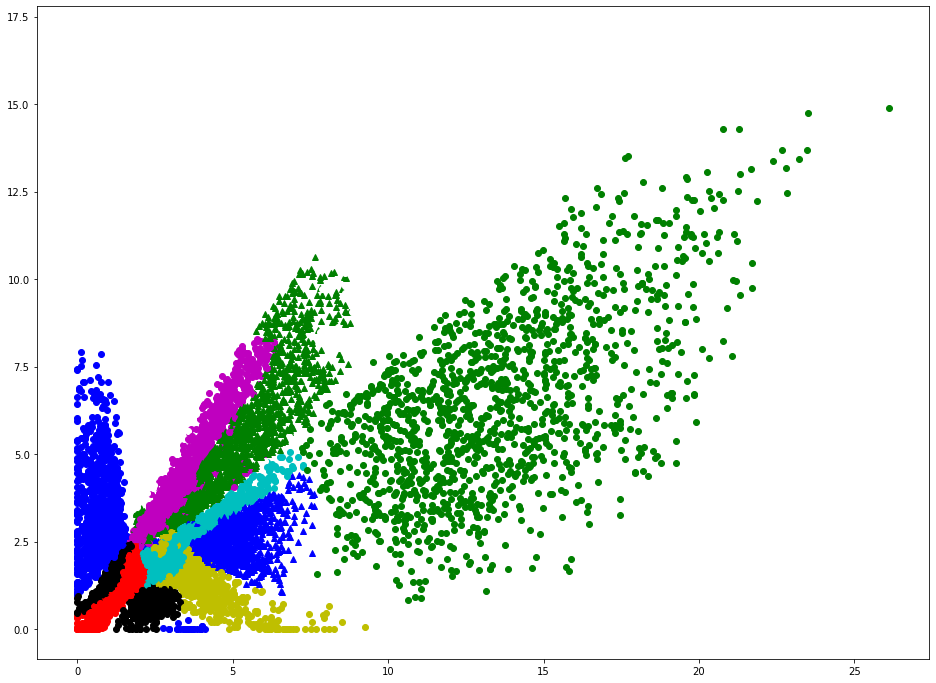

In [9]:
import matplotlib.pyplot as plt

markers=['bo','go','ro','co','mo','yo','ko','wo','b^','g^']
fig = plt.figure()
plt.figure(figsize=(16, 12))

for i in range(len(y_pred)):
  if(y_pred[i]==0):
    plt.plot(Xtest[i,0],Xtest[i,1],markers[0])
  elif(y_pred[i]==1):
    plt.plot(Xtest[i,0],Xtest[i,1],markers[1])
  elif(y_pred[i]==2):
    plt.plot(Xtest[i,0],Xtest[i,1],markers[2])
  elif(y_pred[i]==3):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[3])
  elif(y_pred[i]==4):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[4])
  elif(y_pred[i]==5):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[5])
  elif(y_pred[i]==6):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[6])
  elif(y_pred[i]==7):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[7])
  elif(y_pred[i]==8):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[8])
  elif(y_pred[i]==9):
      plt.plot(Xtest[i,0],Xtest[i,1],markers[9])
